In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class Bandit:

    def __init__(self):
        self.arm_values = np.random.normal(0,1,10) ### 10 arms
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)

    def get_reward(self, action):
        noise = np.random.normal(0,1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self, epsilon):
        rand_num = np.random.random()
        if epsilon > rand_num:
            return np.random.randint(10)
        
        else:
            return np.argmax(self.est_values)
        

    def update_est(self, action, reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])




In [38]:
bandit_test = Bandit()
print(bandit_test.arm_values)
print(bandit_test.est_values)
print(bandit_test.K)


[-0.09078151  0.69819419 -1.99677809 -0.58604728 -2.58440652 -0.18659878
  1.85057727 -1.49066103 -0.47546561 -0.71240472]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
def experiment(bandit, Npulls, epsilon):
    history = []

    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action, R)
        history.append(R)

    return np.array(history)

In [41]:
Nexp = 500 ### number of experiments
Npulls = 3000

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)

for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment(bandit, Npulls, 0.0)

    bandit = Bandit()
    avg_outcome_eps0p01 += experiment(bandit, Npulls, 0.01)
    
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment(bandit, Npulls, 0.1)


avg_outcome_eps0p0 /= float(Nexp)
avg_outcome_eps0p01 /= float(Nexp)
avg_outcome_eps0p1 /= float(Nexp)


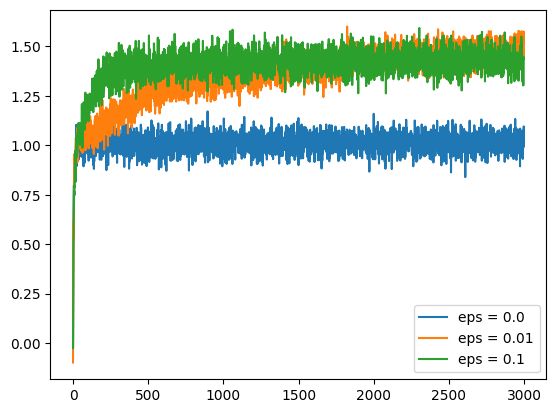

In [42]:
plt.plot(avg_outcome_eps0p0, label= "eps = 0.0")
plt.plot(avg_outcome_eps0p01, label= "eps = 0.01")
plt.plot(avg_outcome_eps0p1, label= "eps = 0.1")
# plt.ylim(0, 2.2)
plt.legend()

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as ss
from IPython import display
import tweepy
import random
import sys

In [4]:
keyFile = open('keys.txt', 'r')

consumer_key = keyFile.readline().rstrip()
consumer_secret = keyFile.readline().rstrip()
access_token = keyFile.readline().rstrip()
access_token_secret = keyFile.readline().rstrip()
keyFile.close()


In [7]:
print(consumer_key, consumer_secret, access_token, access_token_secret)

jJu6E2DUIWUTHSauS4O1QXo75 NuKgsgTKIcRQQLa2cl04OWxnB1Yqin38IFgB2eWJMUwWboWKfm 1300324302802292737-1cB873csXVtlxnNEd8sbtIC40DAi5W 0ODYObhI6ioJli7R5SBOyfioTGGrUTXOwY8KLPx1avqMe


In [8]:

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [9]:
class BanditEpsGreedy(object):
    """
    Use Epsilon-Greedy Method
    """
    def __init__(self,keys,init,epsilon=0.1):
        self.epsilon = epsilon
        self.ActionValue = {}
        for key in keys:
            self.ActionValue[key] = init

    def get_reward(self,action,text):
        if any(x in text for x in action):
            return 1
        else:
            return 0

    def choose_action(self):
        """
        For 1-epsilon of the time, choose the action with the highest estimated value.
        For epsilon of the time, randomly choose an action
        """
        random_num = np.random.rand()
        if random_num<self.epsilon:
            return random.choice(self.ActionValue.keys())
        else:
            return max(self.ActionValue, key=lambda x:self.ActionValue.get(x)[1])
    
    def update(self,action,reward):
        """
        Update estimated value by keeping running average of rewards for each action
        """
        K = self.ActionValue[action][0]
        Value = self.ActionValue[action][1]
        K += 1
        alpha = 1./K
        Value += alpha * (reward - Value)
        self.ActionValue[action] = (K,Value)
        
    def plotme(self):
        """
        Display results
        """
        display.clear_output(wait=True)
        for key in self.ActionValue:
            print(str.format('action: {0}, Value: {1:.2f}, K: {2}', key,self.ActionValue[key][1],self.ActionValue[key][0]))

In [13]:
# from tweepy import StreamListener
# from tweepy import Stream
print("Tweepy Version:", tweepy.__version__)

class StreamWatcherHandler(tweepy.StreamListener):
    """ Handles all incoming tweets as discrete tweet objects.
    """
    
    def __init__(self,bandit):
        super(StreamWatcherHandler, self).__init__()
        self.bandit = bandit
 
    def on_status(self, status):
        """Called when status (tweet) object received.
        """
        action = self.bandit.choose_action()
        reward = self.bandit.get_reward(action,status.text.strip().lower())
        self.bandit.update(action,reward)
        self.bandit.plotme()
        return True
    
    def on_error(self, status):
        print(status)

bandit = BanditEpsGreedy([('hillary','clinton'),('donald','trump'),('bernie','sanders')],(0,0.))
swh = StreamWatcherHandler(bandit)
stream = tweepy.Stream(auth, swh)
try:
    print("enter")
    stream.filter(track=['president'])
except KeyboardInterrupt:
    sys.exit(0)

Tweepy Version: 3.10.0
enter
404
404
404
404
404


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [16]:
import tweepy

# Create a class inheriting from tweepy.StreamListener
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        # Do something with the incoming tweet
        print(status.text)

my_stream_listener = MyStreamListener()
my_stream = tweepy.Stream(auth=auth, listener=my_stream_listener)

# Start streaming with specific keywords
my_stream.filter(track=["president", "Biden"])


In [18]:
import tweepy

print("Tweepy Version:", tweepy.__version__)

class MyStream(tweepy.Stream):
    def on_status(self, status):
        print("enter")
        print(status.text)


Tweepy Version: 3.10.0
